In [23]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

# Load dataset
data = fetch_california_housing()

# Convert to pandas DataFrame
x = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='Target (HouseValue)')

x = np.array(x)
y = np.array(y)



# Display the first few rows
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude  Target (HouseValue)
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88    -122.23                4.526
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86    -122.22                3.585
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85    -122.24                3.521
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85    -122.25                3.413
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85    -122.25                3.422


## normalise

In [24]:
def normalise(x):
    mu = np.mean(x, axis = 0)
    sigma = np.std(x, axis = 0)

    x = (x - mu)/sigma 

    return x, sigma, mu

## cost

In [30]:
# def compute_cost(x,y,w,b):
#     cost = 0
#     m = len(y)

#     for i in range(m):
#         f_wb = np.dot(x[i], w) + b
#         cost = (f_wb - y[i]) **2
#     cost /= m
#     return cost

# def compute_cost(X, y, w, b):
#     m = len(y)
#     cost = 0
#     for i in range(m):
#         f_wb = np.dot(X[i], w) + b
#         cost += (f_wb - y[i]) ** 2
#     return cost / (2 * m)

def compute_cost(x, y, w, b):
    m = len(y)
    f_wb = np.dot(x, w) + b
    cost = (1 / (2 * m)) * np.sum((f_wb - y) ** 2)
    return cost

## gradient descent

In [31]:
def gradient_descent(x,y,w,b,alpha,iterations):
    m = len(y)
    cost_history = []
    dj_dw = 0
    dj_db = 0
    for i in range(iterations):
        f_wb = np.dot(x,w) + b
        error = f_wb - y

        dj_dw = (1/m) * (np.dot(x.T, error))
        dj_db = (1/m) * (sum(error))

        w -= alpha * dj_dw
        b -= alpha * dj_db

        cost = compute_cost(x,y,w,b)
        cost_history.append(cost)

    return w,b,cost_history 

## train the data

In [44]:
x_norm, sigma, mu = normalise(x)

w = np.zeros(x.shape[1]) 
b = 0
alpha = 0.0009
iterations = 6000

w_final, b_final, cost_history = gradient_descent(x_norm,y,w,b,alpha,iterations)

print(f"------------------{w_final} and {b_final}-----------------")

------------------[ 0.78940019  0.19408617 -0.03203817  0.03904684  0.02037514 -0.04394366
 -0.33689055 -0.29492156] and 2.0592380477493144-----------------


In [45]:
model = LinearRegression()

model.fit(x_norm, y)

print(f"------model prediction {model.coef_} and {model.intercept_} ")

------model prediction [ 0.8296193   0.11875165 -0.26552688  0.30569623 -0.004503   -0.03932627
 -0.89988565 -0.870541  ] and 2.0685581690891386 


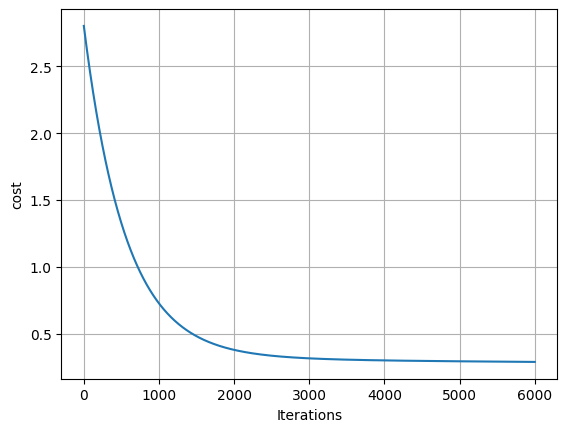

In [46]:
plt.plot(cost_history)
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('cost')
plt.show()

## compare predictions 

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Custom predictions
y_pred_gd = np.dot(x_norm, w_final) + b_final

# Sklearn predictions
model = LinearRegression()
model.fit(x_norm, y)
y_pred_sklearn = model.predict(x_norm)

print("MAE:", mean_absolute_error(y_pred_sklearn, y_pred_gd))
print("MSE:", mean_squared_error(y_pred_sklearn, y_pred_gd))


MAE: 0.18369427783150385
MSE: 0.05816323338275291


## HOUSE PRIDICTION 

In [54]:
import numpy as np

# List of feature names in order
feature_names = [
    "Median Income (10,000s)",
    "House Age",
    "Average Rooms",
    "Average Bedrooms",
    "Population",
    "Average Occupancy",
    "Latitude(~32 to ~42)",
    "Longitude(~-124 to ~-114)"
]

# Take input for each feature
print("Enter the features of the new house.")
print("Example:")
print("4.0     # Median income")
print("20.0    # House age")
print("5.0     # Average rooms")
print("1.0     # Average bedrooms")
print("500.0   # Population")
print("2.0     # Average occupancy")
print("34.2    # Latitude(~32 to ~42)")
print("118.4   # Longitude(~-124 to ~-114)\n")

new_house = []
for name in feature_names:
    value = float(input(f"{name}: "))
    new_house.append(value)

# Convert to numpy array and reshape
new_house = np.array(new_house).reshape(1, -1)

# Normalize input using your training mu and sigma
new_house_norm = (new_house - mu) / sigma

# Predict using your trained model
predicted_value = np.dot(new_house_norm, w_final) + b_final
predicted_price = predicted_value[0] * 100000

# Output the result
print(f"\n📊 Predicted Median House Price: ${predicted_price:,.2f}")


Enter the features of the new house.
Example:
4.0     # Median income
20.0    # House age
5.0     # Average rooms
1.0     # Average bedrooms
500.0   # Population
2.0     # Average occupancy
34.2    # Latitude(~32 to ~42)
118.4   # Longitude(~-124 to ~-114)



Median Income (10,000s):  6
House Age:  64
Average Rooms:  85
Average Bedrooms:  64
Population:  757
Average Occupancy:  7
Latitude(~32 to ~42):  33
Longitude(~-124 to ~-114):  -120



📊 Predicted Median House Price: $809,166.09
